# 住宅価格の予想

## 練習のための準備
このデータセットには79種類の特徴量（目的変数）がありますが、Week3で探索して分かったようにさまざまなタイプのデータが含まれています。これをどう前処理するかということは機械学習において重要な箇所ですが、今回は回帰問題の学習や評価の練習を優先するため、説明変数(特徴量)GrLivAreaとYearBuiltの2つだけを利用することにします。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

csv_path = 'train.csv'
dataset = pd.read_csv(csv_path)
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 【問題1】練習のために特徴量の選択
データセットを読み込んだ後、説明変数GrLivAreaとYearBuilt、目的変数SalePriceをそれぞれ抜き出してください。

In [2]:
y = dataset['SalePrice']
x = dataset[['GrLivArea', 'YearBuilt']]
df = dataset[['SalePrice', 'GrLivArea', 'YearBuilt']]
x.head()

,GrLivArea,YearBuilt
0,1710,2003
1,1262,1976
2,1786,2001
3,1717,1915
4,2198,2000


## 【問題2】線形回帰による推定と評価
データを簡単に分析、前処理し、 線形回帰 による学習、推定、評価、可視化までの一連の流れを作成・実行してください。


sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation


評価のための指標値は回帰問題では 平均二乗誤差（Mean Squared Error, MSE） を使うことが一般的です。


sklearn.metrics.mean_squared_error — scikit-learn 0.21.3 documentation


可視化は横軸にある特徴量、縦軸に推測した住宅価格といった方法で行えます。
scatterを用いて、実際のデータと予測結果を比較できるグラフを作りましょう。

### 調査

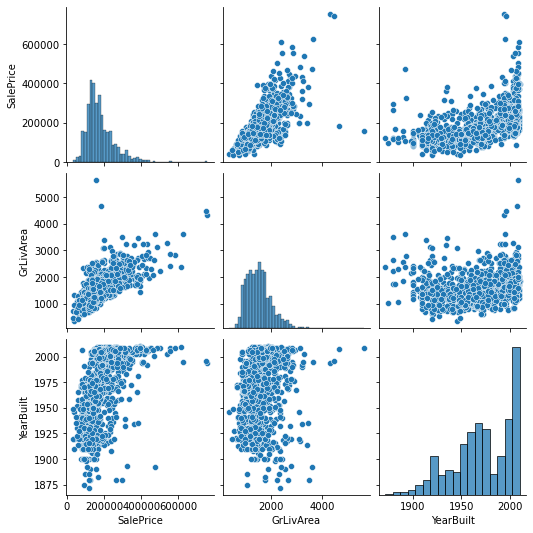

In [3]:
import seaborn as sns
sns.pairplot(df); #相関係数行列を作る

In [4]:
df.corr() # 相関

,SalePrice,GrLivArea,YearBuilt
SalePrice,1.000000,0.708624,0.522897
GrLivArea,0.708624,1.000000,0.199010
YearBuilt,0.522897,0.199010,1.000000


SaleplaeとGlivAreaは対数正規分布によってるので変換しても良いかもしれない  
相関的にはGrLivAreaと目的変数の相関は相当強い

### 予測

In [5]:
# データセットの分別
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, random_state=0)
x_train = df_train.iloc[:, 1:]
y_train = df_train.iloc[:, 0]
x_test = df_test.iloc[:, 1:]
y_test = df_test.iloc[:, 0]

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
print('coef : ', lr.coef_)
print('inter : ', lr.intercept_)

# 2変数なので重回帰分析になるのかと思ったが、単回帰分析の結果を表示した。

coef :  [  98.588892   1041.18622755]
inter :  -2021422.1021001097


In [7]:
lr_g = LinearRegression()
lr_g.fit(x_train[['GrLivArea']], y_train) # 入力はDFしか受け付けない
print('coef : ', lr_g.coef_[0])
print('inter : ', lr_g.intercept_)

coef :  110.42073095272019
inter :  12764.360753617453


In [8]:
lr_y = LinearRegression()
lr_y.fit(x_train[['YearBuilt']], y_train) # 入力はDFしか受け付けない
print('coef : ', lr_y.coef_[0])
print('inter : ', lr_y.intercept_)

coef :  1368.9963063091122
inter :  -2517567.3215381317


結果は予想通り、一番上が気になるところ  
全部プロットしてるのかぁ

### グラフ

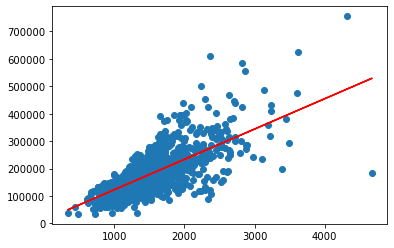

In [9]:
plt.scatter(x_train['GrLivArea'], y_train)
plt.plot(x_train['GrLivArea'], lr_g.predict(x_train[['GrLivArea']]), color='r');

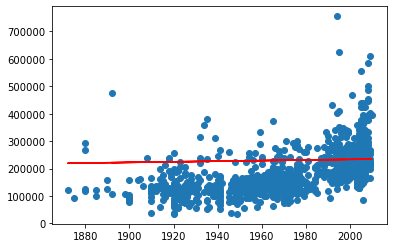

In [10]:
plt.scatter(x_train['YearBuilt'], y_train)
plt.plot(x_train['YearBuilt'], lr_g.predict(x_train[['YearBuilt']]), color='r');

線形回帰なので目に見える形で結果はかけた。  
案の定、一つ目の予測モデルはplotできない(not same size)¥

### 評価
平均2乗誤差  
その名の通り予測値と実際値の誤差を二乗して足し合わせたもの

In [11]:
from sklearn.metrics import mean_squared_error
lr_pred = lr.predict(x_test) # 予測値
y_true = y_test
print(mean_squared_error(y_true, lr_pred)) # 平均二乗誤差

2725908099.0636377


In [12]:
y_pred_g = lr_g.predict(x_test[['GrLivArea']]) # 予測値
print(mean_squared_error(y_true, y_pred_g)) # 平均二乗誤差

3705065901.949675


In [13]:
y_pred_y = lr_y.predict(x_test[['YearBuilt']]) # 予測値
print(mean_squared_error(y_true, y_pred_y)) # 平均二乗誤差

4830018416.251775


結果として  
- 両方
- GrLivArea
- YearBuilt
の順でいい結果が得られた。  
両方とも目的変数との相関が強かったため、この順番の結果となったと考えられる。

#### 予測値とのグラフ

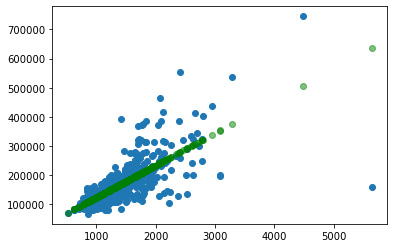

In [14]:
plt.scatter(x_test['GrLivArea'], y_test)
plt.scatter(x_test['GrLivArea'], lr_g.predict(x_test[['GrLivArea']]), color='g', alpha=0.5);

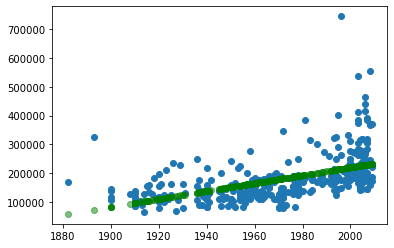

In [15]:
plt.scatter(x_test['YearBuilt'], y_test)
plt.scatter(x_test['YearBuilt'], lr_y.predict(x_test[['YearBuilt']]), color='g', alpha=0.5);

軽く見るかぎりでもGrLivAreaの方が誤差は少なく見える。  
標準化と対数を取ることもしてみたい。

ちなみに

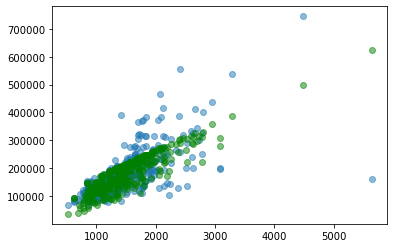

In [16]:
plt.scatter(x_test['GrLivArea'], y_test, alpha=0.5)
plt.scatter(x_test['GrLivArea'], lr.predict(x_test), color='g', alpha=0.5);
#直線にした方が良い？

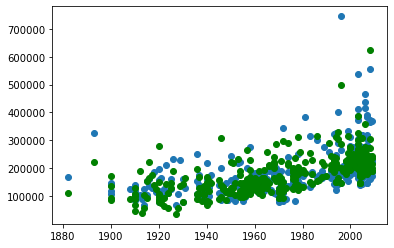

In [17]:
plt.scatter(x_test['YearBuilt'], y_test)
plt.scatter(x_test['YearBuilt'], lr.predict(x_test), color='g');

三次元描けないので二次元で表現するも、ものすごい精度高い

## 【問題3】手法の比較
以下のすべての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。


線形回帰
SVM
決定木
ランダムフォレスト

公式ドキュメントへのリンクは以下です。本来はパラメータチューニングを行いますが、まずはデフォルトの値で実行しましょう。


sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation
sklearn.svm.SVR — scikit-learn 0.21.3 documentation
sklearn.tree.DecisionTreeRegressor — scikit-learn 0.21.3 documentation
sklearn.ensemble.RandomForestRegressor — scikit-learn 0.21.3 documentation

SVM、決定木、ランダムフォレストは分類問題でも使用した手法ですが、回帰問題用のライブラリはそれぞれ専用のものに分かれています。

### SVM

In [18]:
from sklearn import svm
svr = svm.SVR()
svr.fit(x_train, y_train)
svr_pred = svr.predict(x_test) 
print(mean_squared_error(y_true, svr_pred)) # 平均二乗誤差

6941911042.0202465


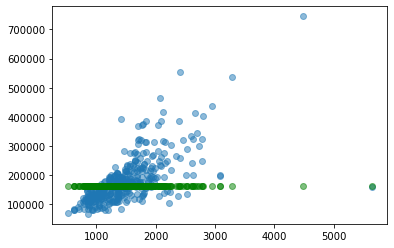

In [19]:
plt.scatter(x_test['GrLivArea'], y_test, alpha=0.5)
plt.scatter(x_test['GrLivArea'], svr.predict(x_test), color='g', alpha=0.5);

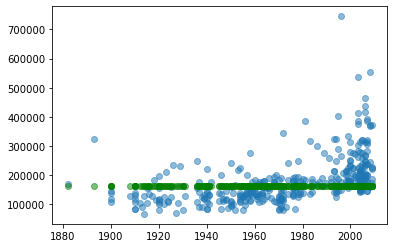

In [20]:
plt.scatter(x_test['YearBuilt'], y_test, alpha=0.5)
plt.scatter(x_test['YearBuilt'], svr.predict(x_test), color='g', alpha=0.5);

### 決定木

In [21]:
from sklearn.tree import DecisionTreeRegressor
dtc = DecisionTreeRegressor()
dtc.fit(x_train, y_train)
dtc_pred = dtc.predict(x_test)
print(mean_squared_error(y_true, dtc_pred)) # 平均二乗誤差

2848034654.832268


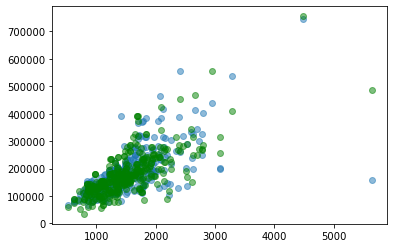

In [22]:
plt.scatter(x_test['GrLivArea'], y_test, alpha=0.5)
plt.scatter(x_test['GrLivArea'], dtc.predict(x_test), color='g', alpha=0.5);

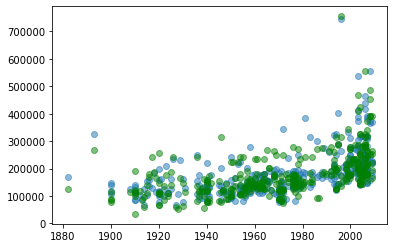

In [23]:
plt.scatter(x_test['YearBuilt'], y_test, alpha=0.5)
plt.scatter(x_test['YearBuilt'], dtc.predict(x_test), color='g', alpha=0.5);

### ランダムフォレスト

In [24]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
clf.fit(x_train, y_train)
clf_pred = clf.predict(x_test)
print(mean_squared_error(y_true, clf_pred)) # 平均二乗誤差

1890066824.2546725


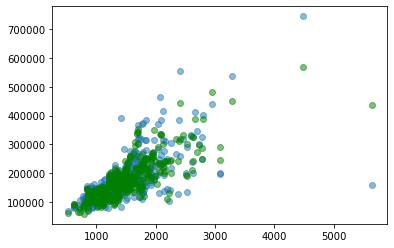

In [25]:
plt.scatter(x_test['GrLivArea'], y_test, alpha=0.5)
plt.scatter(x_test['GrLivArea'], clf.predict(x_test), color='g', alpha=0.5);

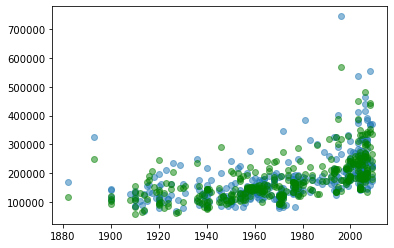

In [26]:
plt.scatter(x_test['YearBuilt'], y_test, alpha=0.5)
plt.scatter(x_test['YearBuilt'], clf.predict(x_test), color='g', alpha=0.5);

In [29]:
print('ランダムフォレスト : {}'.format(mean_squared_error(y_true, clf_pred)))
print('重回帰分析　　　　　　　　　　　: {}'.format(mean_squared_error(y_true, lr_pred)))
print('決定木　　　　　　　　　　　　　　　　　　: {}'.format(mean_squared_error(y_true, dtc_pred)))
print('SVR　　　　　　　　　　　　　　　　　　　　　　: {}'.format(mean_squared_error(y_true, svr_pred)))

ランダムフォレスト : 1890066824.2546725
重回帰分析　　　　　　　　　　　: 2725908099.0636377
決定木　　　　　　　　　　　　　　　　　　: 2848034654.832268
SVR　　　　　　　　　　　　　　　　　　　　　　: 6941911042.0202465


４手法で回帰問題を計算したところチューニングなしでの結果は　　

- ランダムフォレスト
- 重回帰分析
- 決定木
- SVR

の順で精度が良かった。

## 【問題4】（アドバンス課題）他の特徴量も使用しての学習
ここまでは練習のために2つの特徴量だけを使いましたが、他の特徴量を加えるとどのようになるか検証してください。どう選択・加工するかにはデータ分析が重要になってきます。


KaggleのNotebooksも参考にできます。  
### 対数変換

In [30]:
y_log = y.apply(np.log) # 対数変換
GrLivArea_log = x['GrLivArea'].apply(np.log) # 対数変換
x_log = pd.concat([x['YearBuilt'], GrLivArea_log], axis=1) # series同士で横方向に連結（DF）
x_log.head()

,YearBuilt,GrLivArea
0,2003,7.444249
1,1976,7.140453
2,2001,7.487734
3,1915,7.448334
4,2000,7.695303


In [31]:
x_train_log, x_test_log, y_train_log, y_test_log= train_test_split(x_log, y_log, random_state=0)

In [34]:
lr_l = LinearRegression()
lr.fit(x_train_log, y_train_log)
lr_pred_l = np.exp(lr.predict(x_test_log)) # 対数変換したのを元に戻す
y_true_l = np.exp(y_test_log) # 対数変換したのを元に戻す
print(mean_squared_error(y_true_l, lr_pred_l)) # 平均二乗誤差

2555018805.8492093


若干スコアは良くなった！  
同様に各手法に導入

In [36]:
svr_l = svm.SVR()
svr_l.fit(x_train_log, y_train_log)
svr_pred_l = np.exp(svr_l.predict(x_test_log))
print(mean_squared_error(y_true_l, svr_pred_l)) # 平均二乗誤差

5201245095.697021


In [37]:
dtc_l = DecisionTreeRegressor()
dtc_l.fit(x_train_log, y_train_log)
dtc_pred_l = np.exp(dtc_l.predict(x_test_log))
print(mean_squared_error(y_true_l, dtc_pred_l))

2865775112.9007316


In [38]:
clf_l = RandomForestRegressor()
clf_l.fit(x_train_log, y_train_log)
clf_pred_l = np.exp(clf_l.predict(x_test_log))
print(mean_squared_error(y_true_l, clf_pred_l)) # 平均二乗誤差

1924652425.4672155


In [39]:
print('ランダムフォレスト_l : {}'.format(mean_squared_error(y_true, clf_pred_l)))
print('重回帰分析_l　　　　　　　　　　　: {}'.format(mean_squared_error(y_true, lr_pred_l)))
print('決定木_l　　　　　　　　　　　　　　　　　　: {}'.format(mean_squared_error(y_true, dtc_pred_l)))
print('SVR_l　　　　　　　　　　　　　　　　　　　　　　: {}'.format(mean_squared_error(y_true, svr_pred_l)))
print('ランダムフォレスト　　　　　　　: {}'.format(mean_squared_error(y_true, clf_pred)))
print('重回帰分析　　　　　　　　　　　　　　　　: {}'.format(mean_squared_error(y_true, lr_pred)))
print('決定木　　　　　　　　　　　　　　　　　　　　　　　: {}'.format(mean_squared_error(y_true, dtc_pred)))
print('SVR　　　　　　　　　　　　　　　　　　　　　　　　　　　: {}'.format(mean_squared_error(y_true, svr_pred)))

ランダムフォレスト_l : 1924652425.467217
重回帰分析_l　　　　　　　　　　　: 2555018805.8492107
決定木_l　　　　　　　　　　　　　　　　　　: 2865775112.9007325
SVR_l　　　　　　　　　　　　　　　　　　　　　　: 5201245095.697022
ランダムフォレスト　　　　　　　: 1890066824.2546725
重回帰分析　　　　　　　　　　　　　　　　: 2725908099.0636377
決定木　　　　　　　　　　　　　　　　　　　　　　　: 2848034654.832268
SVR　　　　　　　　　　　　　　　　　　　　　　　　　　　: 6941911042.0202465


SVR,DTCはスコア大きくが上がったが、 clfはほぼほぼ変わらない結果となった。  
決定木の場合値の大小で分別していくので、結果はほぼ変わらないらしい  
ランダムフォレストも同様で、片方の説明変数のみ正規化しているため決定木よりも結果がかわらないらしい

In [40]:
x_log.join(y_log).corr()

,YearBuilt,GrLivArea,SalePrice
YearBuilt,1.000000,0.235518,0.586570
GrLivArea,0.235518,1.000000,0.730255
SalePrice,0.586570,0.730255,1.000000


対数変換を行うことでSalePriceとGrLivAreaの相関が3％ほど伸びている  
これにより、全体的にスコアが上がっているという結論

### 特徴量の追加 OverallQual
分析時に最もsalepriceと相関が高かったカテゴリ変数なので今回追加してみる  
カテゴリ変数なのでどうなるかは未定

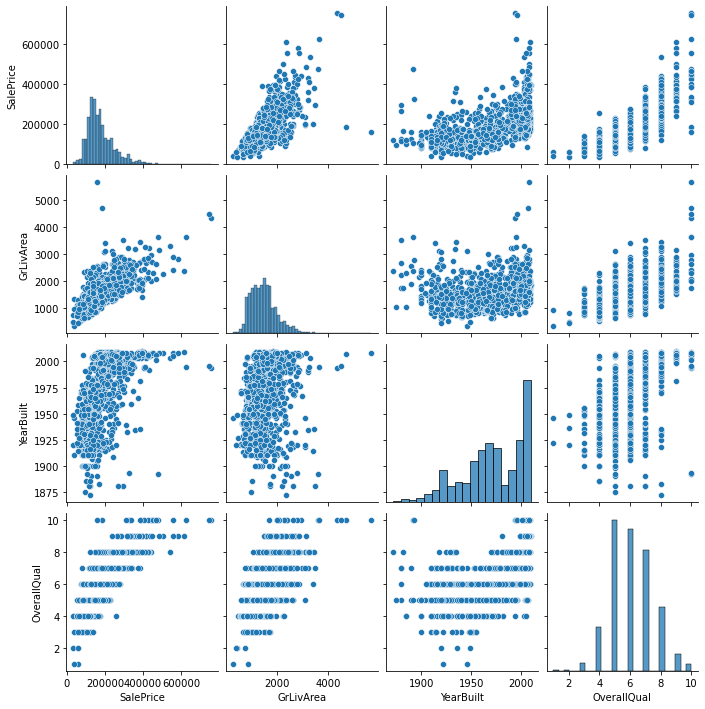

In [41]:
df_2 = dataset[['SalePrice', 'GrLivArea', 'YearBuilt', 'OverallQual']]
x_2 = dataset[['GrLivArea', 'YearBuilt', 'OverallQual']]
sns.pairplot(df_2);

x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2, y, random_state=0)

#### 重回帰分析

In [44]:
lr_2 = LinearRegression()
lr_2.fit(x_train_2, y_train_2)
lr_pred_2 = lr_2.predict(x_test_2)
print('追加前　: {}'.format(mean_squared_error(y_test_2, lr_pred)))
print('追加後　: {}'.format(mean_squared_error(y_test_2, lr_pred_2)))

追加前　: 2725908099.0636377
追加後　: 1985343070.814865


#### SVR

In [46]:
svr_2 = svm.SVR()
svr_2.fit(x_train_2, y_train_2)
svr_pred_2 = svr_2.predict(x_test_2)
print('追加前　: {}'.format(mean_squared_error(y_test_2, svr_pred)))
print('追加後　: {}'.format(mean_squared_error(y_test_2, svr_pred_2)))

追加前　: 6941911042.0202465
追加後　: 6951701896.15042


#### 決定木

In [47]:
dtc_2 = DecisionTreeRegressor()
dtc_2.fit(x_train_2, y_train_2)
dtc_pred_2 = dtc_2.predict(x_test_2)
print('追加前　: {}'.format(mean_squared_error(y_test_2, dtc_pred)))
print('追加後　: {}'.format(mean_squared_error(y_test_2, dtc_pred_2)))

追加前　: 2848034654.832268
追加後　: 1762891519.8447487


#### ランダムフォレスト

In [48]:
clf_2 = RandomForestRegressor()
clf_2.fit(x_train_2, y_train_2)
clf_pred_2 = clf_2.predict(x_test_2)
print('追加前　: {}'.format(mean_squared_error(y_test_2, clf_pred)))
print('追加後　: {}'.format(mean_squared_error(y_test_2, clf_pred_2)))

追加前　: 1890066824.2546725
追加後　: 1288469564.2486408


線形回帰、決定木、ランダムフォレストについてはかなりスコアが上がった。  
SVRについてはほぼほぼ変わらない結果となった。  
SVRは散布図を引くイメージなので、カテゴリ変数を入れてもうまく使えないのかなという結果になった。